# Assessment Lea Wittenhagen

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import binom

## The Case

A cooking website sells cooking equipment. They want to improve their product page. The product page has a rail with media (images or videos). Up until now, they have had a horizontal rail, a UX designer suggested having a vertical one. As a data analyst in the company, you suggested doing an AB test. You now have the results of the test and need to advise the company on whether they should ship the feature (vertical media rail) or not.

In [3]:
data = pd.read_csv('assessment_da25.csv')
data.head(5)

,Variant,Number of page views,GMV (in $),Number of add to cart,Clicks on media,Time on Page (sec),user_id
0,A,5,0.0,0,2,74,0
1,A,4,0.0,4,1,21,1
2,A,4,0.0,2,0,1,2
3,A,5,0.0,0,1,26,3
4,A,5,0.0,3,3,46,4


#### Splitting Dataframe into Variant A DF and Variant B DF

In [4]:
variant_A = data[data["Variant"] == "A"]
variant_B = data[data["Variant"] == "B"]

#### Primary Metric: Conversion Rate

H0: There is no significant difference in conversion rates between the current horizontal media rail and the proposed vertical     
    media rail on the product page. 
    
H1: The vertical media rail on the product page leads to a significant increase/decrease in conversion rates compared to the 
    horizontal media rail.

In [11]:
variant_A.loc[:, "Conversion"] = np.where(variant_A["GMV (in $)"] > 0, 1, 0)
variant_B.loc[:, "Conversion"] = np.where(variant_B["GMV (in $)"] > 0, 1, 0)
variant_A.head(5)

,Variant,Number of page views,GMV (in $),Number of add to cart,Clicks on media,Time on Page (sec),user_id,Conversion
0,A,5,0.0,0,2,74,0,0
1,A,4,0.0,4,1,21,1,0
2,A,4,0.0,2,0,1,2,0
3,A,5,0.0,0,1,26,3,0
4,A,5,0.0,3,3,46,4,0


In [7]:
conversion_rate_A = variant_A["Conversion"].mean()
conversion_rate_B = variant_B["Conversion"].mean()

print("Conversion Rate per Variant:")
print("Variant A conversions:", conversion_rate_A)
print("Variant B conversions:", conversion_rate_B)

Conversion Rate per Variant:
Variant A conversions: 0.08
Variant B conversions: 0.097


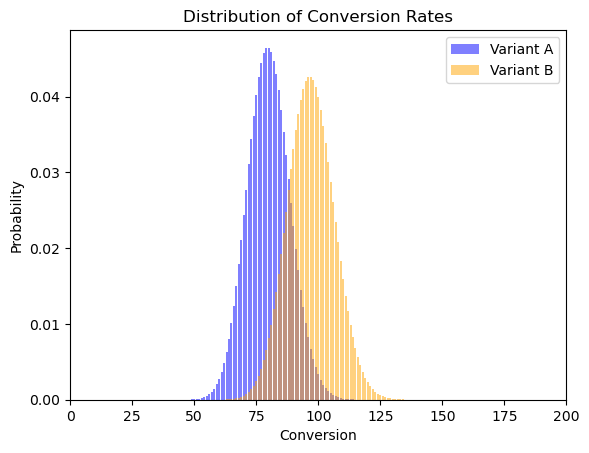

In [9]:
sample_size_A = len(variant_A)
sample_size_B = len(variant_B)

x_A = np.arange(0, sample_size_A+1)
pmf_A = binom.pmf(x_A, sample_size_A, conversion_rate_A)

x_B = np.arange(0, sample_size_B+1)
pmf_B = binom.pmf(x_B, sample_size_B, conversion_rate_B)

plt.bar(x_A, pmf_A, alpha=0.5, label='Variant A', color='blue')
plt.bar(x_B, pmf_B, alpha=0.5, label='Variant B', color='orange')
plt.xlabel('Conversion')
plt.ylabel('Probability')
plt.title('Distribution of Conversion Rates')

plt.xlim(0, 200)
plt.legend()

plt.show()

In [64]:
stats.ttest_ind(variant_A["Conversion"], variant_B["Conversion"], equal_var = False)

TtestResult(statistic=-1.3383240139279355, pvalue=0.18094426040762615, df=1983.059959332643)

The p-value is greater than the chosen significance level of 0.05. This means, we do not have reason to doubt the null hypothesis. We fail to reject the null hypotesis for the primary metric **Conversion Rate** and this test does *not* show a stastical significant difference. 

#### Secondary Metric I: Number of Add To Carts

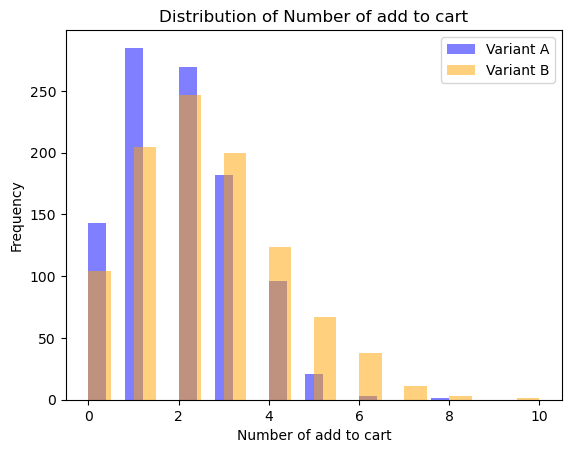

In [93]:
plt.hist(variant_A['Number of add to cart'], bins=20, alpha=0.5, label='Variant A', color='blue')
plt.hist(variant_B['Number of add to cart'], bins=20, alpha=0.5, label='Variant B', color='orange')

plt.xlabel('Number of add to cart')
plt.ylabel('Frequency')
plt.title('Distribution of Number of add to cart')
plt.legend()

plt.show()

In [73]:
ATC_mean_A = variant_A["Number of add to cart"].mean()
ATC_mean_B = variant_B["Number of add to cart"].mean()

print("Number of Add to Cart Means:")
print("Variant A Add to Carts:", ATC_mean_A)
print("Variant B Add to Carts:", ATC_mean_B)

Number of Add to Cart Means:
Variant A Add to Carts: 1.884
Variant B Add to Carts: 2.469


In [74]:
stats.ttest_ind(variant_A["Number of add to cart"], variant_B["Number of add to cart"], equal_var = False)

TtestResult(statistic=-8.777389396187948, pvalue=3.668898697938531e-18, df=1887.734779232999)

The p-value is smaller than the chosen significance level of 0.05. This means, we reject the null hypothesis for the metric **Number of Add to Carts**. The test shows that the difference is statistically significant. 

#### Secondary Metric II: Clicks on Media

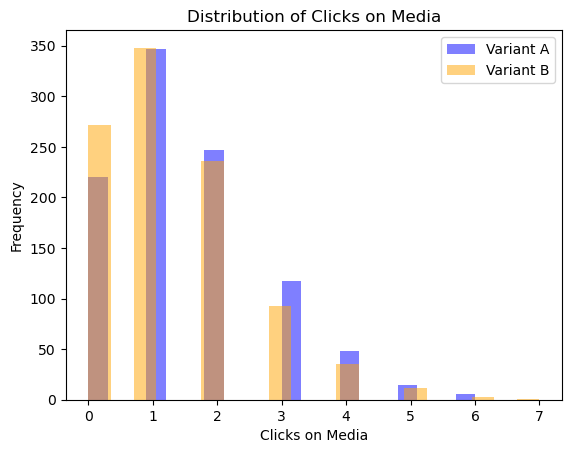

In [95]:
plt.hist(variant_A["Clicks on media"], bins=20, alpha=0.5, label="Variant A", color='blue')
plt.hist(variant_B["Clicks on media"], bins=20, alpha=0.5, label="Variant B", color='orange')

plt.xlabel("Clicks on Media")
plt.ylabel("Frequency")
plt.title("Distribution of Clicks on Media")
plt.legend()

plt.show()

In [77]:
COM_mean_A = variant_A["Clicks on media"].mean()
COM_mean_B = variant_B["Clicks on media"].mean()

print("Clicks on media Means:")
print("Variant A Clicks on media:", COM_mean_A)
print("Variant B Clicks on media:", COM_mean_B)

Clicks on media Means:
Variant A Clicks on media: 1.495
Variant B Clicks on media: 1.324


In [100]:
stats.ttest_ind(variant_A["Clicks on media"], variant_B["Clicks on media"], equal_var = False)

TtestResult(statistic=3.1710702328903153, pvalue=0.001541857715988478, df=1994.655646693956)

The p-value is smaller than the chosen significance level of 0.05. This means, we reject the null hypothesis for the metric **Clicks on Media**. The test shows that the difference is statistically significant. 

#### Secondary Metric III: Time on Page

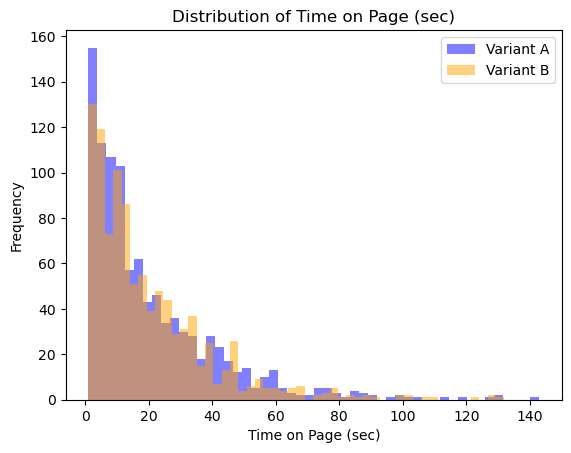

In [94]:
plt.hist(variant_A["Time on Page (sec)"], bins=50, alpha=0.5, label="Variant A", color='blue')
plt.hist(variant_B["Time on Page (sec)"], bins=50, alpha=0.5, label="Variant B", color='orange')

plt.xlabel("Time on Page (sec)")
plt.ylabel("Frequency")
plt.title("Distribution of Time on Page (sec)")
plt.legend()

plt.show()

In [84]:
TOP_mean_A = variant_A["Time on Page (sec)"].mean()
TOP_mean_B = variant_B["Time on Page (sec)"].mean()

print("Time on Page (sec) Means:")
print("Variant A Time on Page (sec):", TOP_mean_A)
print("Variant B Time on Page (sec):", TOP_mean_B)

Time on Page (sec) Means:
Variant A Time on Page (sec): 20.543
Variant B Time on Page (sec): 20.047


In [86]:
stats.ttest_ind(variant_A["Time on Page (sec)"], variant_B["Time on Page (sec)"], equal_var = False)

TtestResult(statistic=0.5554299489081426, pvalue=0.5786630478332149, df=1989.8790205360176)

The p-value is greater than the chosen significance level of 0.05. This means, we do not have reason to doubt the null hypothesis for the metric **Time on Page**. We fail to reject the null hypothesis and this test does not show a statistical significant difference. 